<a href="https://colab.research.google.com/github/aryan-norbert/wasserstoff-AiInternTask/blob/main/wasserstoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Image analysis app


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
#identifying the objects in image

from ultralytics import YOLO
import os

!pip install ultralytics

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

input_dir = "data/input_images/"
output_dir = "data/output/"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for image_filename in os.listdir(input_dir):
  if image_filename.endswith(('.jpg', '.jpeg', '.png')):  # Process common image formats
    image_path = os.path.join(input_dir, image_filename)

    # Perform object detection on the image
    results = model(image_path)

    # Save the identified output image
    output_filename = os.path.join(output_dir, f"identified_{image_filename}")
    results[0].save(output_filename)

    print(f"Identified output for {image_filename} saved to: {output_filename}")


100%|██████████| 6.25M/6.25M [00:00<00:00, 254MB/s]



image 1/1 /content/data/input_images/cycle.jpg: 352x640 5 persons, 2 bicycles, 10 cars, 292.0ms
Speed: 16.0ms preprocess, 292.0ms inference, 32.8ms postprocess per image at shape (1, 3, 352, 640)
Identified output for cycle.jpg saved to: data/output/identified_cycle.jpg


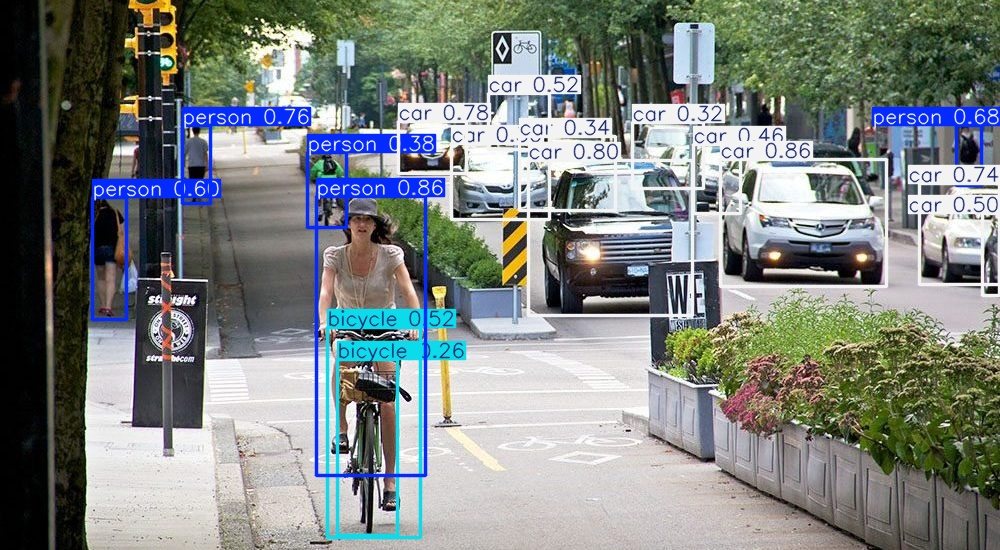

In [4]:
# producing the image here

from IPython.display import Image

# Assuming 'identified_image.jpg' is in the output directory
identified_image_path = os.path.join(output_dir, "/content/data/output/identified_cycle.jpg")  # Replace 'identified_image.jpg' with the actual filename

# Display the image
Image(filename=identified_image_path)


In [5]:
# segmenting the image form data/input_images and save the segments as different images in segmented_images2 folder

from ultralytics import YOLO # Import the YOLO library
import os
import cv2

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt') # Re-initialize the YOLO model

input_dir = "data/input_images/"  # Directory containing identified images
output_dir = "data/segmented_images2/"  # Directory to save segmented images

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for image_filename in os.listdir(input_dir):
    if image_filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(input_dir, image_filename)
        img = cv2.imread(image_path)

        # Perform object detection on the image
        results = model(image_path, save=False)

        # Iterate through detected objects and segment
        for idx, det in enumerate(results[0].boxes.data):
            class_id = int(det[5])
            class_name = model.names[class_id]
            xmin, ymin, xmax, ymax, conf, _ = det

            # Extract object segment
            cropped_img = img[int(ymin):int(ymax), int(xmin):int(xmax)]

            # Save segmented object with label as filename
            output_filename = os.path.join(output_dir, f"{class_name}{idx+1}.jpg")
            cv2.imwrite(output_filename, cropped_img)

            print(f"Segmented {class_name}{idx+1} from {image_filename} saved to: {output_filename}")


image 1/1 /content/data/input_images/cycle.jpg: 352x640 5 persons, 2 bicycles, 10 cars, 169.0ms
Speed: 5.4ms preprocess, 169.0ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)
Segmented person1 from cycle.jpg saved to: data/segmented_images2/person1.jpg
Segmented car2 from cycle.jpg saved to: data/segmented_images2/car2.jpg
Segmented car3 from cycle.jpg saved to: data/segmented_images2/car3.jpg
Segmented car4 from cycle.jpg saved to: data/segmented_images2/car4.jpg
Segmented person5 from cycle.jpg saved to: data/segmented_images2/person5.jpg
Segmented car6 from cycle.jpg saved to: data/segmented_images2/car6.jpg
Segmented person7 from cycle.jpg saved to: data/segmented_images2/person7.jpg
Segmented person8 from cycle.jpg saved to: data/segmented_images2/person8.jpg
Segmented car9 from cycle.jpg saved to: data/segmented_images2/car9.jpg
Segmented bicycle10 from cycle.jpg saved to: data/segmented_images2/bicycle10.jpg
Segmented car11 from cycle.jpg saved to: data/segme

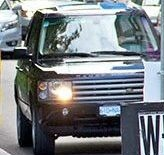

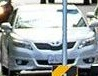

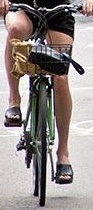

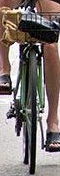

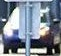

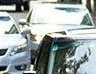

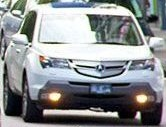

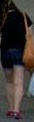

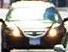

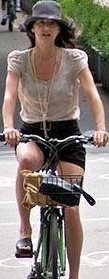

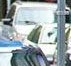

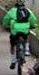

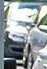

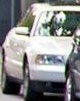

In [6]:
# producing all the segmented images which are saved in data/segmented_images/(images)

import os
from IPython.display import Image, display

image_dir = "data/segmented_images2/"  # Replace with the actual directory

for filename in os.listdir(image_dir):
  if filename.endswith(('.jpg', '.jpeg', '.png')):
    image_path = os.path.join(image_dir, filename)
    display(Image(filename=image_path))


In [8]:
# now caption the output of the above code in the table, name the table as captioning the (input_images name). in the table, give seq number, then name output of segmented_images (eg. car2) and caption of segment

!pip install transformers
from transformers import BlipProcessor, BlipForConditionalGeneration  # Import necessary classes
import os
from IPython.display import Image, display
from PIL import Image  # Import the PIL Image class

# ... (rest of your code)
# Load the captioning model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

input_dir = "data/segmented_images2/"  # Directory containing segmented images

# Prepare the table data
table_data = []
seq_number = 1
for image_filename in os.listdir(input_dir):
    if image_filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(input_dir, image_filename)

        # Load and preprocess the image
        raw_image = Image.open(image_path).convert('RGB')
        inputs = processor(raw_image, return_tensors="pt")

        # Generate caption
        out = model.generate(**inputs)
        caption = processor.batch_decode(out, skip_special_tokens=True)[0]

        table_data.append([seq_number, image_filename, caption])
        seq_number += 1

# Print the table (replace 'input_images name' with the actual name)
print(f"### Captioning the (input_images name)")
print("| Seq Number | Segmented Image | Caption |")
print("|---|---|---|")
for row in table_data:
    print(f"| {row[0]} | {row[1]} | {row[2]} |")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


### Captioning the (input_images name)
| Seq Number | Segmented Image | Caption |
|---|---|---|
| 1 | car3.jpg | a police car is parked on the side of the road |
| 2 | car16.jpg | a man is seen in the middle of a traffic cone |
| 3 | bicycle10.jpg | a man riding a bike down a street |
| 4 | bicycle17.jpg | a man riding a bike down a street |
| 5 | car9.jpg | a sign that says no parking |
| 6 | person7.jpg | a man in a black shirt and jeans is standing in front of a window |
| 7 | car14.jpg | a car is seen in the middle of a traffic jam in the capital of cairo |
| 8 | car11.jpg | a blur of a car driving down a road |
| 9 | car2.jpg | a group of people walking down the street |
| 10 | person8.jpg | a woman is bending her leg |
| 11 | car4.jpg | a white car driving down a street |
| 12 | person1.jpg | a woman riding a bike down a street |
| 13 | person5.jpg | a man walking down a street with a dog |
| 14 | car15.jpg | a man in a blue shirt and a white shirt |
| 15 | person13.jpg | a man r

In [15]:
# prompt: produce the text here

# Assuming 'extracted_text.txt' is in the 'data/extracted_text' directory
text_file_path = "data/extracted_text/extracted_text.txt"

# Read the content of the text file
with open(text_file_path, "r") as f:
    extracted_text = f.read()

# Print the extracted text
print(extracted_text)


1.1
What is computer vision?
As humans, We perceive the three-dimensional structure of the world around uS with
ease. Think of how vivid the three-dimensional
apparent
percept is when you look at a vase of flowers
sitting
on the table next to you: You can tell the
and translucency of each
through
the subtle patterns of light and shading that play across its surface and effortlessly segment
each flower from the background of the scene (Figure 1.1). Looking at a framed group por-
trait; you can easily count (and name) all of the people in the picture and even guess at their
emotions from their facial appearance. Perceptual psychologists have spent decades trying to
understand how the visual system works and, even though
can devise
optical illusions"
to tease apart some of its principles (Figure 1.3), a complete solution to this puzzle remains
elusive (Marr 1982; Palmer 1999; Livingstone 2008).
shape
petal
they


In [25]:
!pip install streamlit -q

In [22]:
%%writefile streamlit_app/app.py

import streamlit as st
import os
from PIL import Image
import cv2
import easyocr
from ultralytics import YOLO
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load YOLO model
model_yolo = YOLO('yolov8n.pt')  # Replace with your YOLO model path

# Load captioning model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model_caption = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Initialize OCR reader
reader = easyocr.Reader(['en'])  # You can specify other languages as needed

def identify_and_segment(image_path, output_dir):
    img = cv2.imread(image_path)
    results = model_yolo(image_path, save=False)
    table_data = []
    seq_number = 1
    for idx, det in enumerate(results[0].boxes.data):
        class_id = int(det[5])
        class_name = model_yolo.names[class_id]
        xmin, ymin, xmax, ymax, conf, _ = det
        cropped_img = img[int(ymin):int(ymax), int(xmin):int(xmax)]
        output_filename = os.path.join(output_dir, f"{class_name}{idx+1}.jpg")
        cv2.imwrite(output_filename, cropped_img)

        # Generate caption for the segment
        raw_image = Image.open(output_filename).convert('RGB')
        inputs = processor(raw_image, return_tensors="pt")
        out = model_caption.generate(**inputs)
        caption = processor.batch_decode(out, skip_special_tokens=True)[0]

        table_data.append([seq_number, class_name, caption])
        seq_number += 1
    return table_data

def extract_text(image_path):
    result = reader.readtext(image_path)
    extracted_text = "\n".join([detection[1] for detection in result])
    return extracted_text

def main():
    st.title("Image Analysis App")
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image', use_column_width=True)

        temp_dir = "temp_images"
        os.makedirs(temp_dir, exist_ok=True)
        image_path = os.path.join(temp_dir, uploaded_file.name)
        image.save(image_path)

        # Identify and segment objects
        segmented_dir = "temp_segmented"
        os.makedirs(segmented_dir, exist_ok=True)
        table_data = identify_and_segment(image_path, segmented_dir)

        # Display segmented images and table
        st.subheader("Segmented Objects and Descriptions")
        for row in table_data:
            col1, col2 = st.columns(2)
            segment_path = os.path.join(segmented_dir, f"{row[1]}{row[0]}.jpg")
            col1.image(Image.open(segment_path), use_column_width=True)
            col2.write(f"**{row[1]}**: {row[2]}")

        # Extract text from image
        extracted_text = extract_text(image_path)
        st.subheader("Extracted Text")
        st.write(extracted_text)

        # Placeholder for image summary (you'll need to implement this)
        st.subheader("Image Summary")
        st.write("This feature is coming soon!")

if __name__ == "__main__":
    main()


Writing streamlit_app/app.py


In [24]:
# prompt: list the dependencies for the above code in requirements.txt and save it in streamlit_app

%%writefile streamlit_app/requirements.txt
ultralytics
transformers
Pillow
easyocr
streamlit
opencv-python


Overwriting streamlit_app/requirements.txt


In [34]:
!pip install pyngrok
!pip install -r "/content/streamlit_app/requirements.txt"

In [35]:
import os
from threading import Thread
from pyngrok import ngrok

In [37]:
ngrok.set_auth_token('2kPbSysqDjnjcqr4zoto8QYOzo0_3Vvc1DoCbBdr1CTCsf2mn')

In [38]:
def run_streamlit():
  os.system('streamlit run /content/streamlit_app/app.py --server.port 8501')

In [39]:
thread = Thread(target=run_streamlit)
thread.start()

In [42]:
public_url = ngrok.connect(addr='8501', proto = 'http', bind_tls=True)
print('your streamlit app is live at', public_url)

your streamlit app is live at NgrokTunnel: "https://e60e-35-245-151-20.ngrok-free.app" -> "http://localhost:8501"
